# Predicting Financial Time Series Data with Machine Learning

This is a sample that predicts future price behaviour from past price movements.
Here we implement it with USD/CAD rate as an example, but you can convert it to other market prices by getting other csv files.




In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

## Estruturando e Visualizando os Dados

In [2]:
# transformando dataframes de USDCAD e do PETRÓLEO BRENT

h = pd.read_csv('USDCAD_Candlestick_1_Hour_BID_31.12.2017-14.04.2023.csv')
o = pd.read_csv('BRENT.CMDUSD_Candlestick_1_Hour_BID_31.12.2017-14.04.2023.csv')

In [3]:
# Put USD/CAD hour data into Pandas Dataframe

df = pd.DataFrame(h)
display(df.head())
display(df.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2018 00:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0
1,01.01.2018 01:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0
2,01.01.2018 02:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0
3,01.01.2018 03:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0
4,01.01.2018 04:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0


,Gmt time,Open,High,Low,Close,Volume
46339,15.04.2023 19:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0
46340,15.04.2023 20:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0
46341,15.04.2023 21:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0
46342,15.04.2023 22:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0
46343,15.04.2023 23:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0


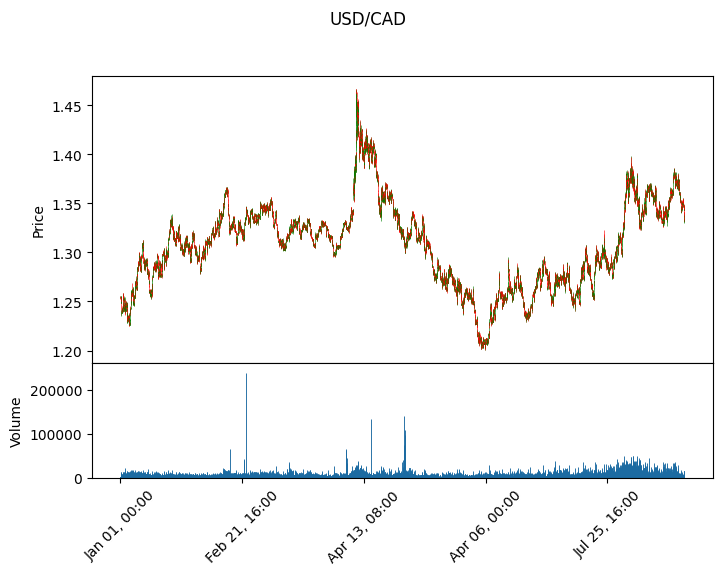

In [4]:
usd_cad = df.copy()
usd_cad.index = pd.to_datetime(usd_cad['Gmt time'])

# Renomeia as colunas para atender aos requisitos do mplfinance
usd_cad = usd_cad.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})

# Define os parâmetros para o gráfico de candlestick
mc = mpf.make_marketcolors(up='g', down='r', wick='inherit', edge='inherit')
s = mpf.make_mpf_style(marketcolors=mc)
kwargs = dict(type='candle', volume=True, figratio=(12,8), figscale=1.0, style=s, title='USD/CAD', warn_too_much_data=100000)

# Cria o gráfico de candlestick com um gráfico de barras de volume
mpf.plot(usd_cad, **kwargs)

In [5]:
# Oil data

df_oil = pd.DataFrame(o)
display(df_oil.head())
display(df_oil.tail())

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2018 00:00:00.000,66.605,66.605,66.605,66.605,0.0
1,01.01.2018 01:00:00.000,66.605,66.605,66.605,66.605,0.0
2,01.01.2018 02:00:00.000,66.605,66.605,66.605,66.605,0.0
3,01.01.2018 03:00:00.000,66.605,66.605,66.605,66.605,0.0
4,01.01.2018 04:00:00.000,66.605,66.605,66.605,66.605,0.0


,Gmt time,Open,High,Low,Close,Volume
46339,15.04.2023 19:00:00.000,86.442,86.442,86.442,86.442,0.0
46340,15.04.2023 20:00:00.000,86.442,86.442,86.442,86.442,0.0
46341,15.04.2023 21:00:00.000,86.442,86.442,86.442,86.442,0.0
46342,15.04.2023 22:00:00.000,86.442,86.442,86.442,86.442,0.0
46343,15.04.2023 23:00:00.000,86.442,86.442,86.442,86.442,0.0


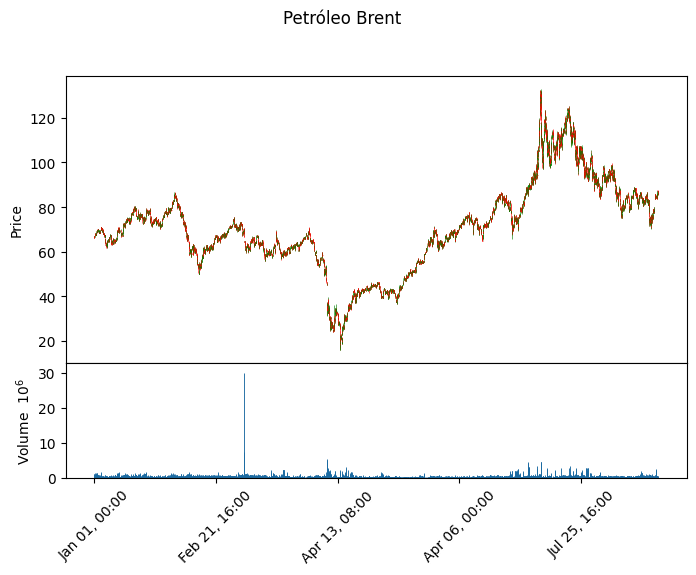

In [6]:
oil = df_oil.copy()
oil.index = pd.to_datetime(oil['Gmt time'])

# Renomeia as colunas para atender aos requisitos do mplfinance
oil = oil.rename(columns={'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume'})

# Define os parâmetros para o gráfico de candlestick
mc = mpf.make_marketcolors(up='g', down='r', wick='inherit', edge='inherit')
s = mpf.make_mpf_style(marketcolors=mc)
kwargs = dict(type='candle', volume=True, figratio=(12,8), figscale=1.0, style=s, title='Petróleo Brent',warn_too_much_data=100000)

# Cria o gráfico de candlestick com um gráfico de barras de volume
mpf.plot(oil, **kwargs)

In [7]:
# Set the date as datetime
df['datetime'] = pd.to_datetime(df['Gmt time'])

In [8]:
# Colocando a data como index
df = df.set_index(df['datetime'])
df.index.names = [None]
df

,Gmt time,Open,High,Low,Close,Volume,datetime
2018-01-01 00:00:00,01.01.2018 00:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 00:00:00
2018-01-01 01:00:00,01.01.2018 01:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 01:00:00
2018-01-01 02:00:00,01.01.2018 02:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 02:00:00
2018-01-01 03:00:00,01.01.2018 03:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 03:00:00
2018-01-01 04:00:00,01.01.2018 04:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 04:00:00
...,...,...,...,...,...,...,...
2023-04-15 19:00:00,15.04.2023 19:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 19:00:00
2023-04-15 20:00:00,15.04.2023 20:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 20:00:00
2023-04-15 21:00:00,15.04.2023 21:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 21:00:00
2023-04-15 22:00:00,15.04.2023 22:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 22:00:00


In [9]:
# Set datetime for oil

df_oil['datetime'] = pd.to_datetime(df_oil['Gmt time'])
df_oil = df_oil.set_index(df_oil['datetime'])
df_oil.index.names = [None]
df_oil

,Gmt time,Open,High,Low,Close,Volume,datetime
2018-01-01 00:00:00,01.01.2018 00:00:00.000,66.605,66.605,66.605,66.605,0.0,2018-01-01 00:00:00
2018-01-01 01:00:00,01.01.2018 01:00:00.000,66.605,66.605,66.605,66.605,0.0,2018-01-01 01:00:00
2018-01-01 02:00:00,01.01.2018 02:00:00.000,66.605,66.605,66.605,66.605,0.0,2018-01-01 02:00:00
2018-01-01 03:00:00,01.01.2018 03:00:00.000,66.605,66.605,66.605,66.605,0.0,2018-01-01 03:00:00
2018-01-01 04:00:00,01.01.2018 04:00:00.000,66.605,66.605,66.605,66.605,0.0,2018-01-01 04:00:00
...,...,...,...,...,...,...,...
2023-04-15 19:00:00,15.04.2023 19:00:00.000,86.442,86.442,86.442,86.442,0.0,2023-04-15 19:00:00
2023-04-15 20:00:00,15.04.2023 20:00:00.000,86.442,86.442,86.442,86.442,0.0,2023-04-15 20:00:00
2023-04-15 21:00:00,15.04.2023 21:00:00.000,86.442,86.442,86.442,86.442,0.0,2023-04-15 21:00:00
2023-04-15 22:00:00,15.04.2023 22:00:00.000,86.442,86.442,86.442,86.442,0.0,2023-04-15 22:00:00


In [10]:
df_oil = df_oil.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]

df_oil = df_oil.rename(columns={'Open': 'Open_oil', 'High': 'High_oil', 'Low':'Low_oil', 'Close':'Close_oil', 'Volume':'Volume_oil'})

df_oil.tail()

,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2023-04-15 19:00:00,86.442,86.442,86.442,86.442,0.0
2023-04-15 20:00:00,86.442,86.442,86.442,86.442,0.0
2023-04-15 21:00:00,86.442,86.442,86.442,86.442,0.0
2023-04-15 22:00:00,86.442,86.442,86.442,86.442,0.0
2023-04-15 23:00:00,86.442,86.442,86.442,86.442,0.0


<Axes: >

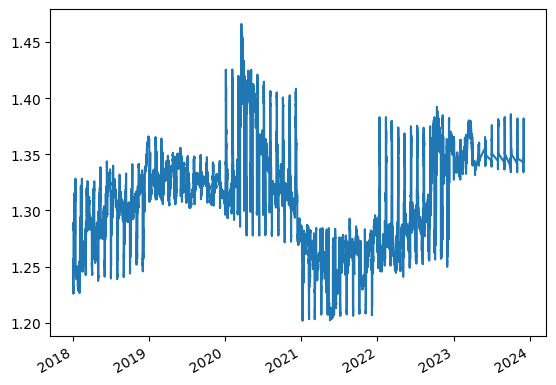

In [11]:
# Just some exploration 

df['Close'].plot()

<Axes: >

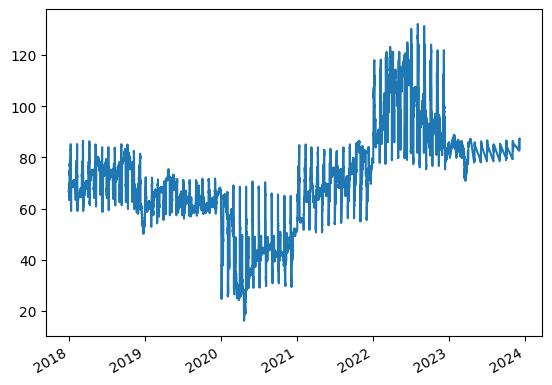

In [12]:
df_oil['Close_oil'].plot()

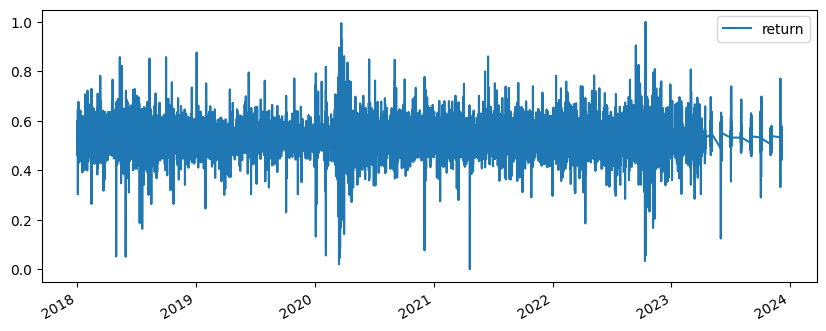

In [13]:
# Create return (close-open) normalized

df['return_next'] = df['Close'].shift(-1) - df['Open'].shift(-1)
return_range = df['return_next'].max() - df['return_next'].min()
df['return_next'] = df['return_next'] / return_range

df['return'] = df['Close'] - df['Open']
return_range = df['return'].max() - df['return'].min()
df['return'] = (df['return'] - df['return'].min()) / return_range

df.plot(y='return', figsize=(10,4))

plt.show()

In [14]:
df.shift(-1).head()

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return
2018-01-01 00:00:00,01.01.2018 01:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 01:00:00,0.0,0.531999
2018-01-01 01:00:00,01.01.2018 02:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 02:00:00,0.0,0.531999
2018-01-01 02:00:00,01.01.2018 03:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 03:00:00,0.0,0.531999
2018-01-01 03:00:00,01.01.2018 04:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 04:00:00,0.0,0.531999
2018-01-01 04:00:00,01.01.2018 05:00:00.000,1.25676,1.25676,1.25676,1.25676,0.0,2018-01-01 05:00:00,0.0,0.531999


In [15]:
df.shift(-1).tail()

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return
2023-04-15 19:00:00,15.04.2023 20:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 20:00:00,0.0,0.531999
2023-04-15 20:00:00,15.04.2023 21:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 21:00:00,0.0,0.531999
2023-04-15 21:00:00,15.04.2023 22:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 22:00:00,0.0,0.531999
2023-04-15 22:00:00,15.04.2023 23:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 23:00:00,NaN,0.531999
2023-04-15 23:00:00,None,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [16]:
# Make label, 1 as rising price, 0 as falling price - prediction for the following timestamp
# ****************** consider when return ==0 next version

df['label'] = df['return_next'].apply(lambda x: 1 if x>0.0 else 0)
df.tail(10)

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2023-04-15 14:00:00,15.04.2023 14:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 14:00:00,0.0,0.531999,0
2023-04-15 15:00:00,15.04.2023 15:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 15:00:00,0.0,0.531999,0
2023-04-15 16:00:00,15.04.2023 16:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 16:00:00,0.0,0.531999,0
2023-04-15 17:00:00,15.04.2023 17:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 17:00:00,0.0,0.531999,0
2023-04-15 18:00:00,15.04.2023 18:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 18:00:00,0.0,0.531999,0
2023-04-15 19:00:00,15.04.2023 19:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 19:00:00,0.0,0.531999,0
2023-04-15 20:00:00,15.04.2023 20:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 20:00:00,0.0,0.531999,0
2023-04-15 21:00:00,15.04.2023 21:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 21:00:00,0.0,0.531999,0
2023-04-15 22:00:00,15.04.2023 22:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 22:00:00,0.0,0.531999,0
2023-04-15 23:00:00,15.04.2023 23:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 23:00:00,NaN,0.531999,0


In [17]:
# The last register shows a NaN

df.dropna(inplace=True)
df.tail()

,Gmt time,Open,High,Low,Close,Volume,datetime,return_next,return,label
2023-04-15 18:00:00,15.04.2023 18:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 18:00:00,0.0,0.531999,0
2023-04-15 19:00:00,15.04.2023 19:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 19:00:00,0.0,0.531999,0
2023-04-15 20:00:00,15.04.2023 20:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 20:00:00,0.0,0.531999,0
2023-04-15 21:00:00,15.04.2023 21:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 21:00:00,0.0,0.531999,0
2023-04-15 22:00:00,15.04.2023 22:00:00.000,1.33569,1.33569,1.33569,1.33569,0.0,2023-04-15 22:00:00,0.0,0.531999,0


In [18]:
df2 = df.copy()

df = df.loc[:,['Open_usdcad', 'High_usdcad', 'Low_usdcad', 'Close_usdcad', 'Volume_usdcad', 'return', 'label']]
df.tail()

,Open,High,Low,Close,Volume,return,label
2023-04-15 18:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0
2023-04-15 19:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0
2023-04-15 20:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0
2023-04-15 21:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0
2023-04-15 22:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0


In [19]:
df = pd.concat([df,df_oil],axis=1, join='inner')
df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2018-01-01 00:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0
2018-01-01 01:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0
2018-01-01 02:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0
2018-01-01 03:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0
2018-01-01 04:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0


In [20]:
df.tail()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil
2023-04-15 18:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0
2023-04-15 19:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0
2023-04-15 20:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0
2023-04-15 21:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0
2023-04-15 22:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0


In [21]:
# Creating datetime features


df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

df['hour'] = df.index.hour


df.head()

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-01-01 00:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,0
2018-01-01 01:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,1
2018-01-01 02:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,2
2018-01-01 03:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,3
2018-01-01 04:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,4


In [22]:
df.dtypes

# we have to change the volume type later

Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
return        float64
label           int64
Open_oil      float64
High_oil      float64
Low_oil       float64
Close_oil     float64
Volume_oil    float64
year            int64
month           int64
day             int64
hour            int64
dtype: object

## Escolhendo um DataFrame para o Trade

In [23]:
# Limiting the dataframe: from 3:00 to 12:00 (10 timestamps) 

df = df.between_time(include_start=True,include_end=True, start_time='03:00:00', end_time='12:00:00')
df.tail(20)

C:\Users\arthu\AppData\Local\Temp\ipykernel_16292\1837619197.py:3: FutureWarning: `include_start` and `include_end` are deprecated in favour of `inclusive`.
  df = df.between_time(include_start=True,include_end=True, start_time='03:00:00', end_time='12:00:00')


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2023-04-14 03:00:00,1.33234,1.33260,1.33177,1.33227,1470.20,0.529496,1,86.282,86.452,86.197,86.418,61580.0003,2023,4,14,3
2023-04-14 04:00:00,1.33226,1.33259,1.33198,1.33229,1404.19,0.533071,0,86.413,86.458,86.348,86.368,20321.0000,2023,4,14,4
2023-04-14 05:00:00,1.33226,1.33289,1.33213,1.33216,1942.68,0.528423,1,86.378,86.473,86.303,86.428,52062.9996,2023,4,14,5
2023-04-14 06:00:00,1.33213,1.33267,1.33166,1.33231,4229.31,0.538434,0,86.423,86.423,86.193,86.218,89750.9999,2023,4,14,6
2023-04-14 07:00:00,1.33233,1.33339,1.33205,1.33221,4578.52,0.527708,1,86.228,86.268,85.693,85.723,155570.0002,2023,4,14,7
2023-04-14 08:00:00,1.33220,1.33321,1.33203,1.33277,5005.68,0.552378,0,85.728,86.133,85.603,86.003,214997.9998,2023,4,14,8
2023-04-14 09:00:00,1.33278,1.33306,1.33145,1.33149,3985.17,0.485878,1,85.998,86.388,85.933,86.378,112108.0000,2023,4,14,9
2023-04-14 10:00:00,1.33152,1.33209,1.33137,1.33166,3393.07,0.537004,1,86.383,86.443,86.263,86.428,106096.0001,2023,4,14,10
2023-04-14 11:00:00,1.33165,1.33342,1.33164,1.33234,4413.30,0.556668,1,86.423,86.483,86.183,86.218,117572.9999,2023,4,14,11
2023-04-14 12:00:00,1.33235,1.33493,1.33001,1.33393,13324.42,0.588488,0,86.223,86.448,86.038,86.083,212455.0011,2023,4,14,12


In [24]:
df.head(10)

,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-01-01 03:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,3
2018-01-01 04:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,4
2018-01-01 05:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,5
2018-01-01 06:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,6
2018-01-01 07:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,7
2018-01-01 08:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,8
2018-01-01 09:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,9
2018-01-01 10:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,10
2018-01-01 11:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,11
2018-01-01 12:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,12


In [25]:
# Make training and test dataset

df_test = df.loc['2023-01-01':,:]  
display(df_test.head())
display(df_test.tail())

df_train = df.loc[:'2022-12-31',:] 
display(df_train.head())
display(df_train.tail())

C:\Users\arthu\AppData\Local\Temp\ipykernel_16292\4166660910.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_test = df.loc['2023-01-01':,:]


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2023-01-01 03:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2023,1,1,3
2023-01-01 04:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2023,1,1,4
2023-01-01 05:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2023,1,1,5
2023-01-01 06:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2023,1,1,6
2023-01-01 07:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2023,1,1,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2023-04-15 08:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0,2023,4,15,8
2023-04-15 09:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0,2023,4,15,9
2023-04-15 10:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0,2023,4,15,10
2023-04-15 11:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0,2023,4,15,11
2023-04-15 12:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,0,86.442,86.442,86.442,86.442,0.0,2023,4,15,12


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2018-01-01 03:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,3
2018-01-01 04:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,4
2018-01-01 05:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,5
2018-01-01 06:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,6
2018-01-01 07:00:00,1.25676,1.25676,1.25676,1.25676,0.0,0.531999,0,66.605,66.605,66.605,66.605,0.0,2018,1,1,7


,Open,High,Low,Close,Volume,return,label,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour
2022-12-31 08:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2022,12,31,8
2022-12-31 09:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2022,12,31,9
2022-12-31 10:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2022,12,31,10
2022-12-31 11:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2022,12,31,11
2022-12-31 12:00:00,1.3546,1.3546,1.3546,1.3546,0.0,0.531999,0,85.942,85.942,85.942,85.942,0.0,2022,12,31,12


In [26]:
df_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'label', 'Open_oil',
       'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil', 'year', 'month',
       'day', 'hour'],
      dtype='object')

## Treinando o Modelo

In [27]:
# Separate features and output

y_train = df_train['label']
X_train = df_train.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]

y_test = df_test['label']
X_test = df_test.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'return', 'Open_oil', 'High_oil', 'Low_oil', 'Close_oil', 'Volume_oil',
       'year', 'month', 'day', 'hour']]


In [28]:
print(X_test.shape)
print(y_test.shape)

print('%% of Class0 : %f y_test' % (np.count_nonzero(y_test == 0)/float(len(y_test))))
print('%% of Class1 : %f y_test' % (np.count_nonzero(y_test == 1)/float(len(y_test))))

(1050, 15)
(1050,)
% of Class0 : 0.625714 y_test
% of Class1 : 0.374286 y_test


In [29]:
print(X_train.shape)
print(y_train.shape)

print('%% of Class0 : %f y_train' % (np.count_nonzero(y_train == 0)/float(len(y_train))))
print('%% of Class1 : %f y_train' % (np.count_nonzero(y_train == 1)/float(len(y_train))))

(18260, 15)
(18260,)
% of Class0 : 0.640088 y_train
% of Class1 : 0.359912 y_train


In [30]:
clf = GradientBoostingClassifier(random_state=0, learning_rate=0.01, n_estimators=1000, verbose=3)

scores = cross_val_score(clf, X_train, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

clf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3022           48.95s
         2           1.2977           48.40s
         3           1.2933           47.52s
         4           1.2890           47.56s
         5           1.2847           48.16s
         6           1.2805           48.37s
         7           1.2764           48.37s
         8           1.2723           48.24s
         9           1.2684           48.01s
        10           1.2645           47.82s
        11           1.2606           47.74s
        12           1.2568           47.67s
        13           1.2531           47.68s
        14           1.2494           47.75s
        15           1.2458           47.74s
        16           1.2423           47.54s
        17           1.2388           47.59s
        18           1.2354           47.46s
        19           1.2320           47.35s
        20           1.2287           47.19s
        21           1.2254           47.27s
        2

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,
                           random_state=0, verbose=3)

## Testando o Model

In [31]:
accuracy = clf.score(X_train, y_train)
print('Testing Accuracy: %f' % accuracy)

Testing Accuracy: 0.703614


In [32]:
# Predict test data

pred = clf.predict(X_test)

In [33]:
# Comparing predicted and label

df_trade = pd.DataFrame(X_test)
df_trade['label']  = y_test
df_trade['pred']   = pred
df_trade['won']    = df_trade['label'] == df_trade['pred']

df_trade

,Open,High,Low,Close,Volume,return,Open_oil,High_oil,Low_oil,Close_oil,Volume_oil,year,month,day,hour,label,pred,won
2023-01-01 03:00:00,1.35460,1.35460,1.35460,1.35460,0.0,0.531999,85.942,85.942,85.942,85.942,0.0,2023,1,1,3,0,0,True
2023-01-01 04:00:00,1.35460,1.35460,1.35460,1.35460,0.0,0.531999,85.942,85.942,85.942,85.942,0.0,2023,1,1,4,0,0,True
2023-01-01 05:00:00,1.35460,1.35460,1.35460,1.35460,0.0,0.531999,85.942,85.942,85.942,85.942,0.0,2023,1,1,5,0,0,True
2023-01-01 06:00:00,1.35460,1.35460,1.35460,1.35460,0.0,0.531999,85.942,85.942,85.942,85.942,0.0,2023,1,1,6,0,0,True
2023-01-01 07:00:00,1.35460,1.35460,1.35460,1.35460,0.0,0.531999,85.942,85.942,85.942,85.942,0.0,2023,1,1,7,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-15 08:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,86.442,86.442,86.442,86.442,0.0,2023,4,15,8,0,0,True
2023-04-15 09:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,86.442,86.442,86.442,86.442,0.0,2023,4,15,9,0,0,True
2023-04-15 10:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,86.442,86.442,86.442,86.442,0.0,2023,4,15,10,0,0,True
2023-04-15 11:00:00,1.33569,1.33569,1.33569,1.33569,0.0,0.531999,86.442,86.442,86.442,86.442,0.0,2023,4,15,11,0,0,True


In [34]:
# Didnt won and won

print(df_trade[df_trade['won'] == False]['won'].count())
print(df_trade[df_trade['won'] == True]['won'].count())

364
686


In [35]:
# % of won

won_percentage = df_trade[df_trade['won'] == True]['won'].count()*100/df_trade['won'].count()
print("Percentual dos Trades acertados: {:.2f}%".format(won_percentage))

Percentual dos Trades acertados: 65.33%


In [36]:
# Total de classes preditas

counts = df_trade['pred'].value_counts()
print(counts)

0    647
1    403
Name: pred, dtype: int64


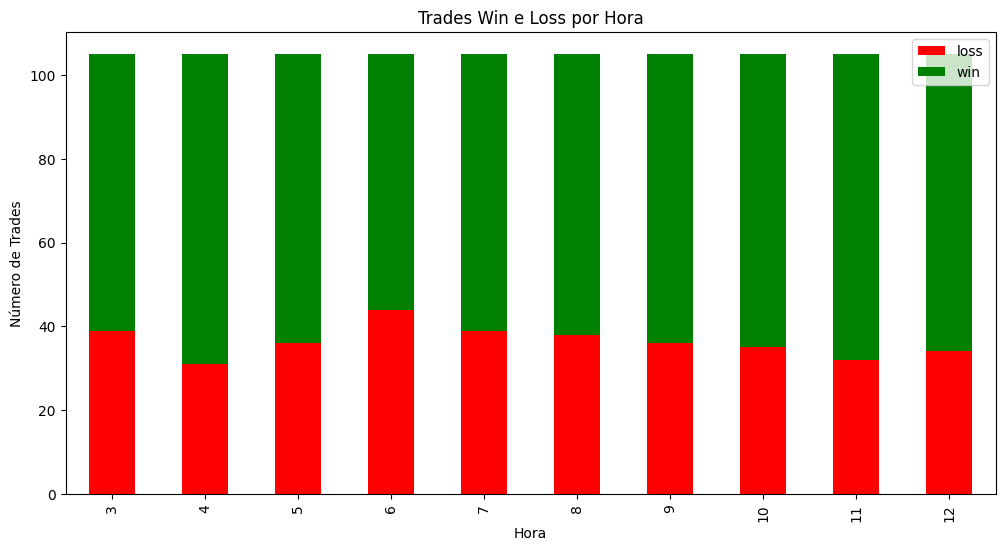

In [37]:
df_hour = df_trade.groupby(['hour', 'won'])['won'].count().unstack()

# Renomeia as colunas para ficar mais claro no gráfico
df_hour.columns = ['loss', 'win']

# Cria o gráfico de barras stackadas
ax = df_hour.plot(kind='bar', stacked=True, figsize=(12,6), color=['red', 'green'])

# Configura os eixos e o título do gráfico
ax.set_xlabel('Hora')
ax.set_ylabel('Número de Trades')
ax.set_title('Trades Win e Loss por Hora')

# Exibe o gráfico
plt.show()